In [1]:
import grafiti as gf
import scanpy as sc
import seaborn as sns

general_path = "/home/mezallj1/grafiti/data/"
model_path = general_path + "spectrum_model"

In [18]:
adata = sc.read_h5ad("/home/mezallj1/grafiti/data/SPECTRUM_squidpy.h5ad") # Data was already run by sq.gr.spatial_neighbors() to create the spatial_connectivities and spatial_distances
adata

AnnData object with n_obs × n_vars = 8883411 × 10
    obs: 'Image', 'spectrum_fov_id', 'spectrum_sample_id', 'tme_inclusion_status', 'cell_type', 'phenotype_full', 'phenotype', 'x0', 'y0', 'patient_id', 'cancer_type', 'tumor_megasite', 'tumor_supersite', 'tumor_site', 'tumor_subsite', 'tumor_type', 'therapy', 'procedure', 'procedure_type', 'wgs_signature', 'scwgs_signature', 'myriad_signature', 'impact_signature', 'impact_gene_signature', 'consensus_signature', 'consensus_signature_short', 'BRCA_gene_status', 'BRCA_mutation_status', 'BRCA_gene_mutation_status', 'all_total', 'all_arm', 'all_chrom', 'all_total_gain', 'all_arm_gain', 'all_chrom_gain', 'all_total_loss', 'all_arm_loss', 'all_chrom_loss', 'internal_total', 'internal_arm', 'internal_chrom', 'internal_total_gain', 'internal_arm_gain', 'internal_chrom_gain', 'internal_total_loss', 'internal_arm_loss', 'internal_chrom_loss', 'terminal_total', 'terminal_arm', 'terminal_chrom', 'terminal_total_gain', 'terminal_arm_gain', 'terminal

In [19]:
status_plus = ["{}_{}".format(x,y) for x,y in zip(adata.obs["consensus_signature"],adata.obs["wgd_status"])]
adata.obs["status_plus"] = status_plus

adata = adata[adata.obs["consensus_signature"] != "Undetermined"]
adata = adata[adata.obs["tumor_supersite"]=="Adnexa"]
# adata = adata[adata.obs["status_plus"].isin(["HRD-Dup_Non-WGD","HRD-Dup_WGD"])]
# adata = adata[adata.obs["tumor_supersite"].isin(["Adnexa"])]

df = adata.obs
for x in set(adata.obs["tumor_supersite"]):
    dfx = df[df["tumor_supersite"] == x]
    print(x, len(set(dfx["spectrum_fov_id"])))

set(adata.obs["status_plus"])
import cellcharter as cc
cc.gr.remove_long_links(adata)

Adnexa 399


/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/cellcharter/gr/_build.py:65: ImplicitModificationWarning: Trying to modify attribute `.obsp` of view, initializing view as actual.
  conns[dists > threshold] = 0
/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/cellcharter/gr/_build.py:66: ImplicitModificationWarning: Trying to modify attribute `.obsp` of view, initializing view as actual.
  dists[dists > threshold] = 0


In [7]:
#adata.write("spectrum_after_links.h5ad")

In [3]:
adata = sc.read_h5ad("spectrum_after_links.h5ad") # SPECTRUN_squidpy.h5ad after cc.gr.remove_long_links()

In [21]:
gae = gf.ml.GAE(adata, layers=[10,10], lr=0.05, exponent=2, distance_scale=10)

Generating PyTorch Geometric Dataset...
Setting up Model...
Ready to train!


/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/grafiti/model/_model.py:108: RuntimeWarning: divide by zero encountered in divide
  attrs = 1. / (np.array(attrs)**exponent)


In [22]:
gae.load("spectrum_model_1010")

In [6]:
#gae.train(1000, update_interval=10, threshold=1e-3)

In [7]:
#gae.save("spectrum_model_1010") # Save the model after it has been re-trained

In [8]:
gae.load_embedding(adata, encoding_key="X_grafiti") # Load features into the z latent space

In [9]:
gf.tl.umap(adata) # Embed grafiti latent space into umap latent space (2 dimensions)

/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


In [11]:
#adata.write("spectrum_all_new.h5ad") # After X_grafiti and X_umap embedding has been loaded into adata

In [12]:
#adata = sc.read_h5ad("spectrum_all_new.h5ad") # After X_grafiti and X_umap embedding has been loaded into adata

In [13]:
gf.tl.find_motifs_gmm(adata,k=15)

Initialization 0
Initialization converged: True


GaussianMixture(covariance_type='spherical', n_components=15, random_state=0,
                verbose=True)

In [14]:
adata.write("spectrum_final_1010.h5ad")

/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


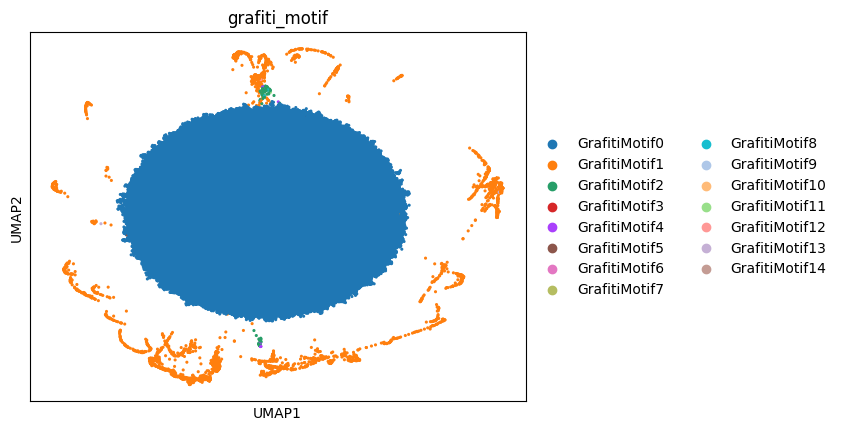

In [15]:
sc.pl.umap(adata,color=["grafiti_motif"],s=20)

/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


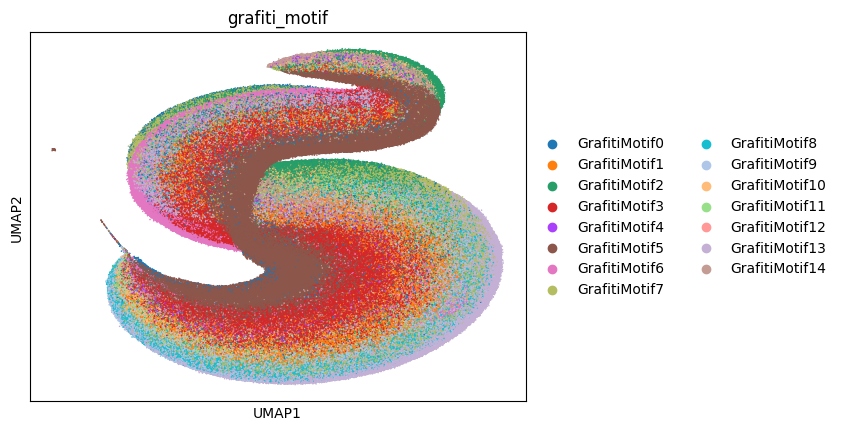

In [38]:
sc.pl.umap(adata,color=["grafiti_motif"],s=5)

/home/mezallj1/miniconda3/envs/grafiti/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


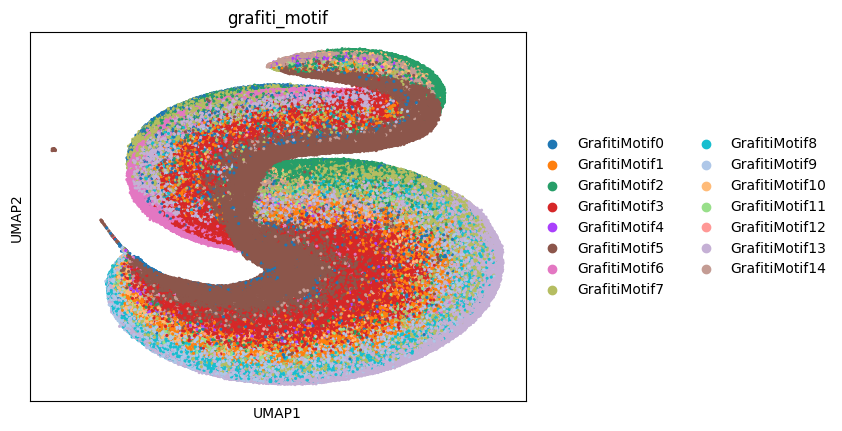

In [39]:
sc.pl.umap(adata,color=["grafiti_motif"],s=20)

In [17]:
adata.obs['grafiti_motif']

cell_id
SPECTRUM-OV-002_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[59126,16695] - resolution #1_1               GrafitiMotif0
SPECTRUM-OV-002_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[59126,16695] - resolution #1_2               GrafitiMotif0
SPECTRUM-OV-002_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[59126,16695] - resolution #1_3               GrafitiMotif0
SPECTRUM-OV-002_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[59126,16695] - resolution #1_4               GrafitiMotif0
SPECTRUM-OV-002_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[59126,16695] - resolution #1_5               GrafitiMotif0
                                                                                                                             ...      
SPECTRUM-OV-083_S1_RIGHT_FALLOPIAN_TUBE_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[57840,15767] - resolution #1_8302    GrafitiMotif0
SPECTRUM-OV-083_S1_RIGHT_FALLOPIAN_TUBE_CD68_TO

In [24]:
adata.X

array([[0.64884705, 0.52917266, 0.48936614, ..., 1.        , 0.        ,
        0.71815578],
       [0.81966131, 0.74758658, 0.74678314, ..., 1.        , 0.        ,
        0.69435605],
       [1.        , 0.87336133, 0.8464602 , ..., 0.22300614, 0.70906661,
        0.63440842],
       ...,
       [0.44260073, 0.43932694, 0.84622436, ..., 0.11439764, 0.43511802,
        0.        ],
       [0.58028685, 0.57742991, 0.57673154, ..., 0.1182159 , 0.30684546,
        0.93634017],
       [0.45389885, 0.45107354, 0.4503829 , ..., 0.07290538, 0.27949619,
        0.80870651]])